# Just In Time Trajectory

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import * 
from trajectory.plot import * 
import matplotlib.pyplot as plt
from IPython.display import display
import trajectory as tj
import pandas as pd
import numpy as np

[[0        250↗   750@5000  ↘0       5000]]
[[5000       0↗  1000@5000  ↘0       5000]]
[[5000       0↗  2000@5000  ↘0       5000]]
[[5000       0↗   500@5000  ↘0       5000]]
[[5000       0↗  1000@5000  ↘0       5000]]


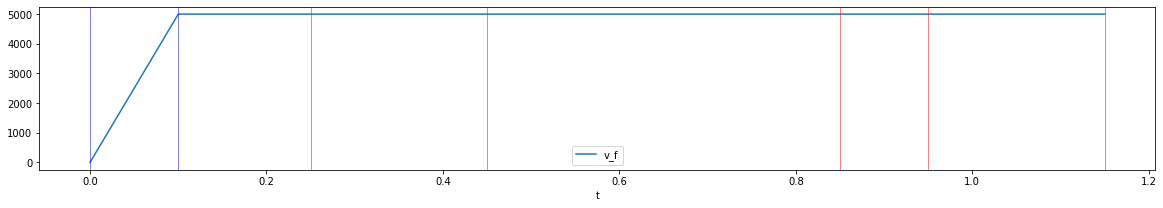

In [14]:

sl = SegmentList([Joint(5_000, 50_000)])

x = 1000

sl.rmove([x])
sl.rmove([x])
sl.rmove([2*x])
sl.rmove([x/2])
sl.rmove([x])

for e in sl.segments:
    e.update()

    print(e.joint_segments)

    pass
  
plot_segment_list(sl.dataframe)

0.4500|[0        250↗  1750@5000  ↘0       5000] [0        250↗  1750@5000  ↘0       5000]
0.4000|[5000       0↗  2000@5000  ↘0       5000] [5000     196↗   804@2321  ↘0       2321]
0.8143|[5000     193↗  1806@2371  ↘0       2371] [2321     196↗  3804@5000  ↘0       5000]
0.4138|[2371     193↗  1806@5000  ↘0       5000] [5000      16↗  1984@4833  ↘0       4833]


axis           0                                        1                    \
               x      v_i      v_f   ss     del_t       x      v_i      v_f   
t                                                                             
0.100000   250.0      0.0   5000.0    a       0.1   250.0      0.0   5000.0   
0.450000  1750.0   5000.0   5000.0    c      0.35  1750.0   5000.0   5000.0   
0.503571     NaN      NaN      NaN  NaN       NaN   196.0   5000.0  2321.43   
0.850000     NaN      NaN      NaN  NaN       NaN   804.0  2321.43  2321.43   
0.850000  2000.0   5000.0   5000.0    c       0.4     NaN      NaN      NaN   
0.902577   194.0   5000.0  2371.17    a  0.052576     NaN      NaN      NaN   
0.903571     NaN      NaN      NaN  NaN       NaN   196.0  2321.43   5000.0   
1.664349     NaN      NaN      NaN  NaN       NaN  3804.0   5000.0   5000.0   
1.664350  1806.0  2371.17  2371.17    c  0.761773     NaN      NaN      NaN   
1.667689     NaN      NaN      NaN  NaN       NaN    16.0   5000.0   4833.0   
1.716926   194.0  2371.17   5000.0    a  0.052576     NaN      NaN      NaN   
2.078171  1806.0   5000.0   5000.0    c  0.361245     NaN      NaN      NaN   
2.078171     NaN      NaN      NaN  NaN       NaN  1984.0   4833.0   4833.0   

axis                     
           ss     del_t  
t                        
0.100000    a       0.1  
0.450000    c      0.35  
0.503571    a  0.053571  
0.850000    c  0.346429  
0.850000  NaN       NaN  
0.902577  NaN       NaN  
0.903571    a  0.053571  
1.664349    c  0.760778  
1.664350  NaN       NaN  
1.667689    a   0.00334  
1.716926  NaN       NaN  
2.078171  NaN       NaN  
2.078171    c  0.410481

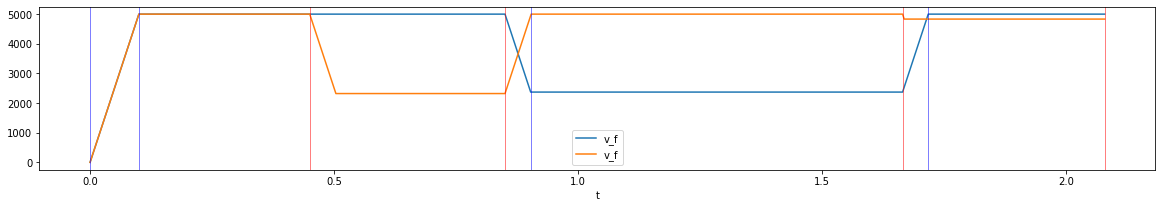

In [13]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 2000

sl.rmove([x, x])
sl.rmove([x,x/2])
sl.rmove([x,2*x])
sl.rmove([x,x])

for e in sl.segments:
    e.update()

print(sl)
plot_segment_list(sl.dataframe)
sl.dataframe_stacked

In [28]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 30000

sl.rmove([x, x])
sl.rmove([x,x/2])
sl.rmove([x,2*x])
sl.rmove([x,x])
sl.rmove([100,x])
sl.rmove([x,x])

for e in sl.segments:
    e.update()

print(sl)
plot_segment_list(sl.dataframe)
sl.dataframe_stacked

6.0500|[0        250↗ 29750@5000  ↘0       5000] [0        250↗ 29750@5000  ↘0       5000]
6.0000|[5000       0↗ 30000@5000  ↘0       5000] [5000     188↗ 14812@2489  ↘0       2489]
12.0126|[5000     187↗ 29812@2492  ↘0       2492] [2489     188↗ 59812@5000  ↘0       5000]
6.0126|[2492     187↗ 29812@5000  ↘0       5000] [5000       1↗ 29999@4989  ↘0       4989]
6.0000|[5000     249↗  -150@-25   ↘0        -25] [4989       1↗ 29999@5000  ↘0       5000]
6.0505|[-25      249↗ 29750@5000  ↘0       5000] [5000       4↗ 29996@4958  ↘0       4958]


AssertionError: Inconsistent directions 5000 -25.42

In [5]:
def accel_x(v0, v1, a):
    """Distance required to accelerate from v0 to v1 at acceleration a"""
    
    dt = (v1-v0) / a # Time to change from v0 to v1 at max acceleration

    return ((v0+v1)/2) * dt # Area of velocity trapezoid


accel_x(v_max/2, v_max, a_max)

1250.0000000000002